In [121]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [122]:
dataset = pd.read_csv('../../Data/clean_profile_data_all.csv')

In [123]:
dataset.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking
0,316,164,152,106.0,2.90,9,3,northeastern_university,accept,15
1,314,163,151,114.0,3.53,7,3,northeastern_university,accept,15
2,307,160,147,88.0,3.00,36,0,northeastern_university,accept,15
3,330,169,161,113.0,2.40,48,3,northeastern_university,accept,15
4,316,163,153,99.0,2.71,30,0,northeastern_university,accept,15


In [124]:
dataset.university_name.value_counts()

northeastern_university                        1653
state_university_of_new_york_at_stony_brook     602
north_carolina_state_university_raleigh         588
syracuse_university                             518
university_of_texas_dallas                      474
illinois_institute_of_technology                435
university_of_california_irvine                 400
texas_a_m_university_college_station            387
university_of_north_carolina_at_charlotte       380
indiana_university_bloomington                  343
rochester_institute_of_technology               341
university_of_colorado_boulder                  341
new_york_university                             318
university_of_texas_arlington                   312
rutgers_university_new_brunswick                304
university_of_maryland_college_park             264
george_mason_university                         264
university_of_cincinnati                        242
university_of_texas_austin                      233
carnegie_mel

In [125]:
target_universities=dataset.university_name.unique().tolist()

In [126]:
from sklearn.utils import resample

In [127]:
resampled_dfs=[]
resampled_df = pd.DataFrame()
for each in target_universities:
    if dataset[(dataset.university_name==each )].shape[0]> 600:
        
        resampled_dfs.append(resample(dataset[(dataset.university_name==each )&(dataset.status=='accept')],replace=True,n_samples=300,random_state=123))
        resampled_dfs.append(resample(dataset[(dataset.university_name==each) &(dataset.status=='reject')],replace=True,n_samples=300,random_state=123))
        
    elif dataset[(dataset.university_name==each )].shape[0] < 200:
        resampled_dfs.append(resample(dataset[(dataset.university_name==each )&(dataset.status=='accept')],replace=True,n_samples=125,random_state=123))
        resampled_dfs.append(resample(dataset[(dataset.university_name==each) &(dataset.status=='reject')],replace=True,n_samples=125,random_state=123))
    else:
        resampled_dfs.append(dataset[(dataset.university_name==each )&(dataset.status=='accept')])
        resampled_dfs.append(dataset[(dataset.university_name==each )&(dataset.status=='reject')])
        

resampled_df = pd.concat( [ f for f in resampled_dfs ] )
    

In [128]:
resampled_df.groupby(by='university_name')['status'].value_counts()

university_name                              status
carnegie_mellon_university                   accept    125
                                             reject    125
clemson_university                           accept    125
                                             reject    125
george_mason_university                      accept    168
                                             reject     96
georgia_institiute_of_technology             accept    125
                                             reject    125
illinois_institute_of_technology             accept    268
                                             reject    167
indiana_university_bloomington               accept    271
                                             reject     72
kansas_state_university                      accept    125
                                             reject    125
michigan_technological_university            accept    125
                                             reject    125
new_

In [129]:
dataset =resampled_df.copy()

In [130]:
dataset

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking
510,314,165,149,100.0,2.90,0,2,northeastern_university,accept,15
365,315,162,153,100.0,3.30,60,0,northeastern_university,accept,15
382,309,163,146,104.0,2.64,32,0,northeastern_university,accept,15
322,310,162,148,99.0,2.85,24,0,northeastern_university,accept,15
98,320,170,150,104.0,3.86,2,1,northeastern_university,accept,15
17,304,157,147,95.0,2.82,0,0,northeastern_university,accept,15
106,313,164,149,110.0,2.90,7,0,northeastern_university,accept,15
123,317,165,152,114.0,2.64,24,0,northeastern_university,accept,15
569,304,155,149,99.0,2.76,20,0,northeastern_university,accept,15
214,304,154,150,105.0,3.20,31,3,northeastern_university,accept,15


In [131]:
#train test split for modelling
training, testing = train_test_split(dataset, test_size=0.25, random_state=5, stratify=dataset[['university_name', 'status']])

In [132]:
testing.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie_mellon_university                   accept    31
                                             reject    31
clemson_university                           accept    31
                                             reject    31
george_mason_university                      accept    42
                                             reject    24
georgia_institiute_of_technology             accept    31
                                             reject    31
illinois_institute_of_technology             accept    67
                                             reject    42
indiana_university_bloomington               accept    68
                                             reject    18
kansas_state_university                      accept    31
                                             reject    31
michigan_technological_university            accept    31
                                             reject    31
new_york_university 

In [133]:
training.shape,testing.shape

((7383, 10), (2461, 10))

In [134]:
model_name=[]
model_train_acc=[]
model_test_accuracy=[]
model_train_f1=[]
model_test_f1=[]


In [135]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [136]:
def get_result(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler() 
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    prob_test=pd.DataFrame(model.predict_proba(X_test))
    prob_train=pd.DataFrame(model.predict_proba(X_train))
    test_f1_score = f1_score(Y_test, y_pred,pos_label='accept')
    train_f1_score = f1_score(Y_train, y_train_pred,pos_label='accept')
    train_accuracy=accuracy_score(Y_train, y_train_pred)
    test_accuracy=accuracy_score(Y_test, y_pred)
    test_cm = confusion_matrix(Y_test, y_pred,labels=['accept','reject'])
    train_cm = confusion_matrix(Y_train, y_train_pred,labels=['accept','reject'])
    model_name.append(model)
    model_train_acc.append(train_accuracy)
    model_test_accuracy.append(test_accuracy)
    model_test_f1.append(test_f1_score)
    model_train_f1.append(train_f1_score)
    return [train_cm,test_cm,train_accuracy,test_accuracy,train_f1_score, test_f1_score, prob_train,prob_test, y_pred,y_train_pred, model,sc]

In [137]:
#test and train roc
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

def generate_cm_roc(model_results):
    test_fpr,test_tpr,test_thresholds = metrics.roc_curve(testing['status'], model_results[7][0],pos_label='accept')
    test_roc_auc = auc(test_fpr, test_tpr)
    train_fpr,train_tpr,train_thresholds = metrics.roc_curve(training['status'], model_results[6][0],pos_label='accept')
    train_roc_auc = auc(train_fpr, train_tpr)
    plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
                 label='Train ROC (auc= %0.2f)' % (train_roc_auc))
    plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
                 label='Test ROC (auc= %0.2f)' % (test_roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    f,ax = plt.subplots(figsize=(2, 2))
    sns.heatmap(model_results[0], annot=True, linewidths=1, fmt= '.1f',ax=ax)
    plt.title('Train Confusion Matrix')
    plt.show()
    f,ax = plt.subplots(figsize=(2, 2))
    sns.heatmap(model_results[1], annot=True, linewidths=1, fmt= '.1f',ax=ax)
    plt.title('Test confusion matrix')
    plt.show()

In [138]:
numerical_data = training.select_dtypes(include = ['int64','float','uint8'])
categorical_data = training.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
numerical_features

array(['gre_score', 'gre_score_quant', 'gre_score_verbal',
       'test_score_toefl', 'undergraduation_score', 'work_ex',
       'papers_published', 'ranking'], dtype=object)

In [139]:
from sklearn.svm import SVC
svc_model=SVC(gamma='auto',probability=True)

svc_model_results=get_result(svc_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])


C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [140]:
print('test_accuracy:',svc_model_results[3])
print('train_accuracy:',svc_model_results[2])
print('test_f1_score:',svc_model_results[5])
print('train_f1_score:',svc_model_results[4])

test_accuracy: 0.6395774075579033
train_accuracy: 0.6655830963023162
test_f1_score: 0.59180855959503
train_f1_score: 0.6219568213137344


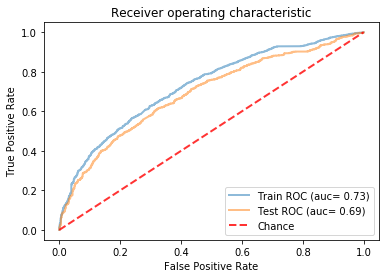

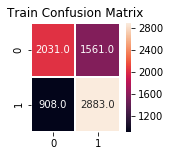

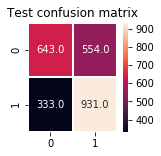

In [141]:
generate_cm_roc(svc_model_results)

In [142]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

decision_tree_model_results=get_result(decision_tree_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [143]:
print('test_accuracy:',decision_tree_model_results[3])
print('train_accuracy:',decision_tree_model_results[2])
print('test_f1_score:',decision_tree_model_results[5])
print('train_f1_score:',decision_tree_model_results[4])

test_accuracy: 0.7513206013815522
train_accuracy: 1.0
test_f1_score: 0.743288590604027
train_f1_score: 1.0


In [144]:
decision_tree_model_results[10].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

<BarContainer object of 8 artists>

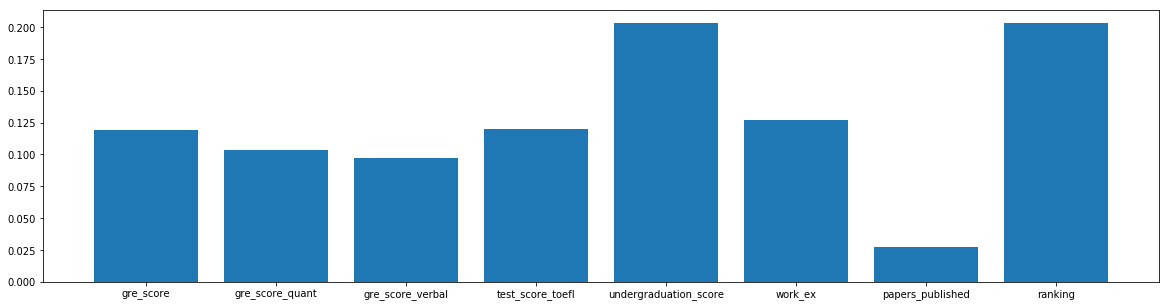

In [145]:
plt.figure(figsize=(20,5))
plt.bar(numerical_features.tolist(),decision_tree_model_results[10].feature_importances_)

In [146]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=10)

random_forest_model_results=get_result(random_forest_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',random_forest_model_results[3])
print('train_accuracy:',random_forest_model_results[2])
print('test_f1_score:',random_forest_model_results[5])
print('train_f1_score:',random_forest_model_results[4])

test_accuracy: 0.7696058512799675
train_accuracy: 0.9901124204253013
test_f1_score: 0.7688544639217284
train_f1_score: 0.9899073690031798


C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [147]:
random_forest_model_results[10].get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [148]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=random_forest_model_results[10]

param_grid = {"n_estimators": [10,15,20,25,30],
             "max_depth": [10,15,20,25],
             "bootstrap": [True, False]}
random_forest_model_clf = GridSearchCV(random_forest_model,param_grid,cv=5,return_train_score=True)


random_forest_model_results=get_result(random_forest_model_clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',random_forest_model_results[3])
print('train_accuracy:',random_forest_model_results[2])
print('test_f1_score:',random_forest_model_results[5])
print('train_f1_score:',random_forest_model_results[4])

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.7862657456318569
train_accuracy: 0.9974265203846675
test_f1_score: 0.776360544217687
train_f1_score: 0.9973548656550187


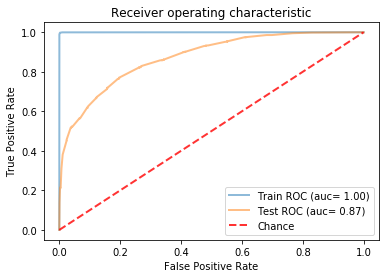

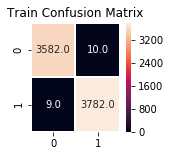

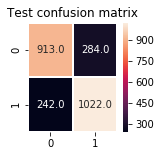

In [149]:
generate_cm_roc(random_forest_model_results)

In [150]:
random_forest_model_results[10].best_score_

0.7728565623730191

In [151]:
random_forest_model_results[10].cv_results_

{'mean_fit_time': array([0.0366982 , 0.05056262, 0.0665451 , 0.08374925, 0.09877429,
        0.0478404 , 0.06578603, 0.08351951, 0.10363717, 0.1266995 ,
        0.05249977, 0.07416949, 0.09584975, 0.11653938, 0.14659562,
        0.05095263, 0.07104774, 0.10386286, 0.12317634, 0.14601703,
        0.04940481, 0.06794877, 0.08744183, 0.11264038, 0.12726445,
        0.05954261, 0.0874454 , 0.11750727, 0.15086956, 0.18154035,
        0.06851068, 0.09915838, 0.12903252, 0.15790658, 0.19325223,
        0.0669507 , 0.10265975, 0.13332834, 0.16220489, 0.19266062]),
 'std_fit_time': array([0.00118381, 0.00039346, 0.00096678, 0.00113873, 0.00168512,
        0.00395863, 0.00233277, 0.00049019, 0.00038278, 0.0033417 ,
        0.0009342 , 0.00194512, 0.00304765, 0.00453373, 0.00142062,
        0.00217664, 0.00096894, 0.00313077, 0.00518786, 0.00574756,
        0.00078168, 0.00160383, 0.00192482, 0.00672367, 0.00170006,
        0.00060016, 0.00180741, 0.0051877 , 0.00469747, 0.01000902,
        0.001

In [152]:
import pickle
# Dump the trained decision tree classifier with Pickle
rf_classifier_pkl_filename = 'student_university_random_forest_predict.pickel'
standard_scaler_filename = 'standard_scaler_rf_model.pickel'

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'wb')
pickle.dump(random_forest_model_results[10], random_forest_classifier_model_pkl)

random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'wb')
pickle.dump(random_forest_model_results[11], sc_rf_classifier_scaler_pkl)

sc_rf_classifier_scaler_pkl.close()

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'rb')
random_forest_classifier_model= pickle.load(random_forest_classifier_model_pkl)
random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'rb')
standard_scaler_rf_classifier= pickle.load(sc_rf_classifier_scaler_pkl)
sc_rf_classifier_scaler_pkl.close()

In [153]:
standard_scaler_rf_classifier

StandardScaler(copy=True, with_mean=True, with_std=True)

In [154]:
predictions=random_forest_classifier_model.predict(standard_scaler_rf_classifier.transform(testing[numerical_features]))

C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [155]:
accuracy_score(testing['status'],predictions)

0.7862657456318569

In [156]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()

gnb_model_results=get_result(gnb_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',gnb_model_results[3])
print('train_accuracy:',gnb_model_results[2])
print('test_f1_score:',gnb_model_results[5])
print('train_f1_score:',gnb_model_results[4])

test_accuracy: 0.5615603413246648
train_accuracy: 0.5801164838141677
test_f1_score: 0.5993316004455997
train_f1_score: 0.6118206862008515


C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [157]:
from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(max_iter=500,solver='adam')

mlp_model_results=get_result(mlp_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',mlp_model_results[3])
print('train_accuracy:',mlp_model_results[2])
print('test_f1_score:',mlp_model_results[5])
print('train_f1_score:',mlp_model_results[4])

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.6529865908167412
train_accuracy: 0.7025599349857782
test_f1_score: 0.6156615661566157
train_f1_score: 0.6736998514115898


In [158]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()

xgb_model_results=get_result(xgb_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',xgb_model_results[3])
print('train_accuracy:',xgb_model_results[2])
print('test_f1_score:',xgb_model_results[5])
print('train_f1_score:',xgb_model_results[4])

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.7025599349857782
train_accuracy: 0.7236895570906136
test_f1_score: 0.6822916666666666
train_f1_score: 0.7070649052268811


In [159]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree


bagging_model=BaggingClassifier(tree.DecisionTreeClassifier(random_state=1),n_estimators = 100, max_features = 0.8)

bagging_model_results=get_result(bagging_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',bagging_model_results[3])
print('train_accuracy:',bagging_model_results[2])
print('test_f1_score:',bagging_model_results[5])
print('train_f1_score:',bagging_model_results[4])

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.7984559122308005
train_accuracy: 1.0
test_f1_score: 0.7887563884156729
train_f1_score: 1.0


In [160]:
bagging_model_results[10].score

<bound method ClassifierMixin.score of BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)>

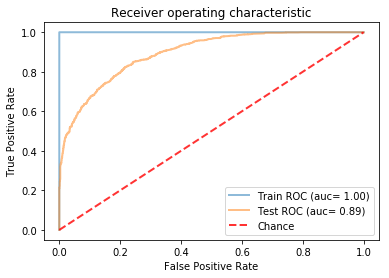

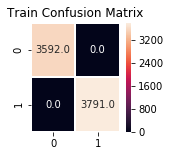

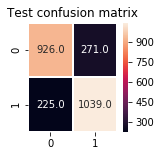

In [161]:
generate_cm_roc(bagging_model_results)

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.7988622511174319
train_accuracy: 0.9978328592712989
test_f1_score: 0.7889125799573561
train_f1_score: 0.9977697240033454


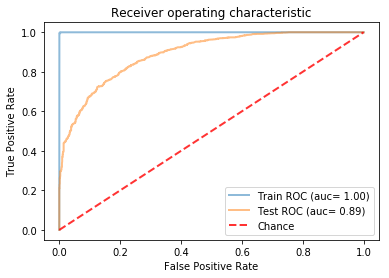

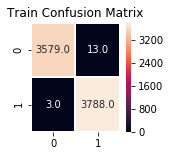

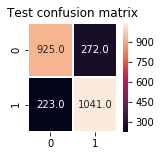

In [162]:

param_grid = {"base_estimator__max_depth" : [30,40,50],
              "max_samples" : [0.05, 0.1, 0.2,0.5,0.75,0.8,1]
             }
clf = GridSearchCV(bagging_model_results[10],param_grid,cv=5,return_train_score=True)

#tree.DecisionTreeClassifier(),n_estimators = 100, max_features = 0.8
bagging_model_results=get_result(clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',bagging_model_results[3])
print('train_accuracy:',bagging_model_results[2])
print('test_f1_score:',bagging_model_results[5])
print('train_f1_score:',bagging_model_results[4])
generate_cm_roc(bagging_model_results)

In [163]:
bagging_model_results[10].cv_results_

{'mean_fit_time': array([0.15987315, 0.21044478, 0.33866568, 0.64281821, 0.8112555 ,
        0.83976521, 0.09232402, 0.14699478, 0.2112134 , 0.33241043,
        0.64591589, 0.82375431, 0.84658084, 0.08864665, 0.14953527,
        0.21237569, 0.32735524, 0.61373448, 0.81496077, 0.85614815,
        0.08861375]),
 'std_fit_time': array([0.00654322, 0.00502258, 0.01606801, 0.02669181, 0.01416529,
        0.01229359, 0.00132227, 0.00146347, 0.00680132, 0.01140434,
        0.02532259, 0.0107407 , 0.00948596, 0.00158019, 0.00225968,
        0.00339983, 0.00625727, 0.01108417, 0.01045753, 0.02362336,
        0.00156536]),
 'mean_score_time': array([0.02536006, 0.02498159, 0.02830696, 0.03162446, 0.03182158,
        0.03219399, 0.01504421, 0.02360778, 0.02538314, 0.02831354,
        0.03161721, 0.03259029, 0.03161759, 0.01503205, 0.02380528,
        0.02499456, 0.02771535, 0.03082566, 0.03240333, 0.03416891,
        0.01425648]),
 'std_score_time': array([1.06930493e-03, 1.32577467e-03, 6.215639

In [164]:
bagging_model_results[10].best_score_

0.7836922660165244

In [165]:
predictions=bagging_model_results[10].best_estimator_.predict(bagging_model_results[11].transform(testing[numerical_features]))
accuracy_score(testing['status'],predictions)

C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.7988622511174319

In [166]:
bagging_model_results[10].best_params_

{'base_estimator__max_depth': 40, 'max_samples': 0.75}

In [167]:
import pickle
# Dump the trained decision tree classifier with Pickle
bagging_classifier_pkl_filename = 'student_university_bagging_classifier_predict.pickel'
standard_scaler_filename = 'standard_scaler_bagging_model.pickel'

bagging_classifier_model_pkl = open(bagging_classifier_pkl_filename, 'wb')
pickle.dump(bagging_model_results[10], bagging_classifier_model_pkl)

bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_filename, 'wb')
pickle.dump(bagging_model_results[11], sc_bagging_classifier_scaler_pkl)

sc_bagging_classifier_scaler_pkl.close()

bagging_classifier_model_pkl = open(bagging_classifier_pkl_filename, 'rb')
bagging_classifier_model= pickle.load(bagging_classifier_model_pkl)
bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_filename, 'rb')
standard_scaler_bagging_classifier= pickle.load(sc_bagging_classifier_scaler_pkl)
sc_bagging_classifier_scaler_pkl.close()

In [168]:
standard_scaler_bagging_classifier

StandardScaler(copy=True, with_mean=True, with_std=True)

In [169]:
predictions=bagging_classifier_model.predict(standard_scaler_bagging_classifier.transform(testing[numerical_features]))

C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [170]:
accuracy_score(testing['status'],predictions)

0.7988622511174319

In [171]:
bagging_classifier_model.classes_

array(['accept', 'reject'], dtype=object)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf =BaggingClassifier(KNeighborsClassifier(),n_estimators = 100, max_features = 0.8)

bagging_model_results1=get_result(knn_clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])


C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.7232832182039821
train_accuracy: 0.8756603006907762
test_f1_score: 0.711073398387781
train_f1_score: 0.8702290076335877


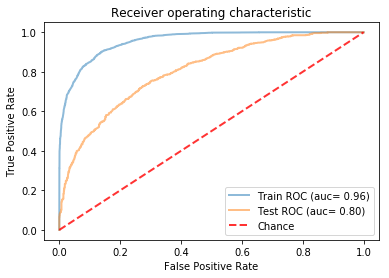

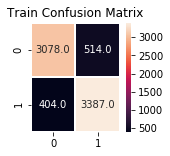

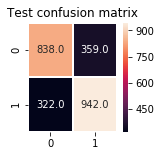

In [173]:
print('test_accuracy:',bagging_model_results1[3])
print('train_accuracy:',bagging_model_results1[2])
print('test_f1_score:',bagging_model_results1[5])
print('train_f1_score:',bagging_model_results1[4])
generate_cm_roc(bagging_model_results1)

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


test_accuracy: 0.7419748069890288
train_accuracy: 0.9387782744141948
test_f1_score: 0.7310461668784413
train_f1_score: 0.9366769403194172


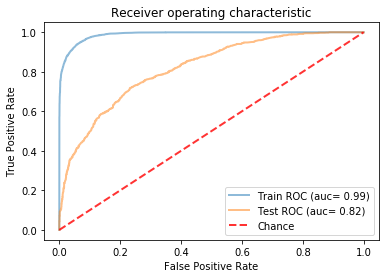

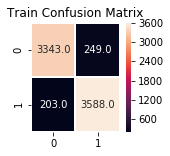

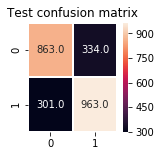

In [174]:
from sklearn.model_selection import GridSearchCV
param_grid = {'base_estimator__n_neighbors' : [3,5,7]}
knn_clf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),n_estimators = 100, max_features = 0.8),param_grid,cv=5)

bagging_model_results1=get_result(knn_clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',bagging_model_results1[3])
print('train_accuracy:',bagging_model_results1[2])
print('test_f1_score:',bagging_model_results1[5])
print('train_f1_score:',bagging_model_results1[4])
generate_cm_roc(bagging_model_results1)

In [175]:
bagging_model_results1[10].best_score_

0.7177299200866857

In [176]:
bagging_model_results1[10].best_params_

{'base_estimator__n_neighbors': 3}

In [177]:
import pickle
# Dump the trained decision tree classifier with Pickle
bagging_classifier_kNN_pkl_filename = 'student_university_kNN_bagging_classifier_predict.pickel'
standard_scaler_kNN_filename = 'standard_scaler_kNN_bagging_model.pickel'

bagging_classifier_model_pkl = open(bagging_classifier_kNN_pkl_filename, 'wb')
pickle.dump(bagging_model_results1[10], bagging_classifier_model_pkl)

bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_kNN_filename, 'wb')
pickle.dump(bagging_model_results1[11], sc_bagging_classifier_scaler_pkl)

sc_bagging_classifier_scaler_pkl.close()

bagging_classifier_model_pkl = open(bagging_classifier_kNN_pkl_filename, 'rb')
bagging_classifier_model= pickle.load(bagging_classifier_model_pkl)
bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_kNN_filename, 'rb')
standard_scaler_bagging_classifier= pickle.load(sc_bagging_classifier_scaler_pkl)
sc_bagging_classifier_scaler_pkl.close()

In [178]:
standard_scaler_bagging_classifier

StandardScaler(copy=True, with_mean=True, with_std=True)

In [179]:
predictions=bagging_classifier_model.predict(standard_scaler_bagging_classifier.transform(testing[numerical_features]))
accuracy_score(testing['status'],predictions)

C:\Users\navee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.7419748069890288

In [180]:
All_Model_results=pd.DataFrame()
All_Model_results["Model"]=model_name
All_Model_results['Train Accuracy']=model_train_acc
All_Model_results['Test Accuracy']=model_test_accuracy
All_Model_results['Train F1 score']=model_train_f1
All_Model_results['Test F1 score']=model_test_f1

In [185]:
All_Model_results

,Model,Train Accuracy,Test Accuracy,Train F1 score,Test F1 score
0,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.665583,0.639577,0.621957,0.591809
1,"DecisionTreeClassifier(class_weight=None, crit...",1.000000,0.751321,1.000000,0.743289
2,"(DecisionTreeClassifier(class_weight=None, cri...",0.990112,0.769606,0.989907,0.768854
3,"GridSearchCV(cv=5, error_score='raise-deprecat...",0.997427,0.786266,0.997355,0.776361
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.580116,0.561560,0.611821,0.599332
5,"MLPClassifier(activation='relu', alpha=0.0001,...",0.702560,0.652987,0.673700,0.615662
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.723690,0.702560,0.707065,0.682292
7,"(DecisionTreeClassifier(class_weight=None, cri...",1.000000,0.798456,1.000000,0.788756
8,"GridSearchCV(cv=5, error_score='raise-deprecat...",0.997833,0.798862,0.997770,0.788913
9,"(KNeighborsClassifier(algorithm='auto', leaf_s...",0.875660,0.723283,0.870229,0.711073


## model performances

In [184]:
All_Model_results.to_csv('All_Model_results.csv',index=False)

# summarizing best model results

<table style="width:100%">
 <tr>
   <th>Model</th>
   <th>Test Accuracy</th>
   <th>Train Accuracy</th>
   <th>Grid Search - Test Accuracy</th>
   <th>Grid Search - Train Accuracy</th>
   <th>Test F1 Score</th>
   <th>Train F1 Score</th>
   <th>Test AUC ROC Curve</th>
   <th>Train AUC ROC Curve</th>
 </tr>
 <tr>
   <th>Bagging - Decision Tree</th>
   <th>0.79</th>
   <th>0.99</th>
   <th>0.80</th>
   <th>0.98</th>
   <th>0.78</th>
   <th>0.99</th>
   <th>0.89</th>
   <th>0.99</th>
 </tr>
  <tr>
   <th>Random Forest Classifer</th>
   <th>0.77</th>
   <th>0.98</th>
   <th>0.78</th>
   <th>0.97</th>
   <th>0.77</th>
   <th>0.97</th>
   <th>0.87</th>
   <th>1.0</th>
 </tr>
 <tr>
   <th>Bagging - kNN(k=3(Best))</th>
   <th>0.72</th>
   <th>0.87</th>
   <th>0.74</th>
   <th>0.94</th>
   <th>0.73</th>
   <th>0.94</th>
   <th>0.82</th>
   <th>0.99</th>
 </tr>

</table>

- Bagging model with Decision Tree is giving us best after GridSearchCV(CV=5) results with ~80% test accuracy and 0.78 f1 score
- Random Forest Classifier is giving us 2nd best results best after GridSearchCV(CV=5) with ~77% test accuracy and 0.77 f1 score
- Bagging model with kNN(k=3) is giving us 3rd best results best after GridSearchCV(CV=5) with ~72% test accuracy and 0.73 f1 score